This jupyter notebook explores the effect of a change in the fine structure constant on nuclear masses, big bang nucleosynthesis, and solar neutrino emissions. It assumes that $\hbar$, $c$, the parameter of QCD, the parameters of the weak interactions, and the lepton and quark masses are all the same as they are in this universe.

However, the fine structure constant is given by
$$
    \widetilde{\alpha} = \frac{\alpha}{2} = \frac{1}{274}.
$$
As above I will use the greek letter $\alpha$ to refer to the fine structure constant in this universe and I will use $\widetilde \alpha$ (pronounced "alpha tilde") to refer to the alternate universe's fine structure constant.

In the alternate universe, we can assume that the neutron-proton mass difference is given by
$$
    m_n - m_p \approx 2 \; \text{MeV}.
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Nuclear Masses

Ignoring pairing effects the Weizsäcker mass formula is
$$
    B(A, Z) = a_V A - a_S A^{2/3} - a_C \frac{Z (Z-1)}{A^{1/3}} - a_{\text{sym}} \frac{(N-Z)^2}{A}.
$$

The volume and surface terms are based on the strong nuclear force, so they should remain unchanged in the parallel universe. So we may take
$$
    a_V = 15.5 \; \text{MeV} \\
    a_S = 16.8 \; \text{MeV},
$$
from Wong's Introductory Nuclear Physics textbook. Similarly, the symmetry term is not based on the fundamental forces but rather on the Pauli exclusion principle. So we may use the value of $a_{\text{sym}} = 23 \; \text{MeV}$ to be the same as in our universe.

In our universe, $a_C = 0.72 \; \text{MeV}$. We can approximate $a_C$ by equating it with the energy of a charged sphere,
$$
    \frac{3}{5} \frac{Z^2 e^2}{4 \pi \epsilon_0 R} = 
    \frac{3}{5} \frac{Z^2 \alpha \hbar c}{R}
    \approx a_C \frac{Z(Z-1)}{A^{1/3}}.
$$

So if the value of the fine structure constant were reduced by one-half, then the Coulomb term in the mass formula would also be reduced by the same amount,
$$
    \alpha \rightarrow \widetilde{\alpha} = \frac{\alpha}{2}
    \quad \Longrightarrow \quad
    a_C \rightarrow \widetilde{a}_C = \frac{a_C}{2}.
$$
Thus, in the parallel universe, we have $\widetilde{a}_C = 0.36 \; \text{MeV}$.

In [3]:
# Lets set the mass formula constants here
a_V = 15.5 # in MeV
a_S = 16.8 # in MeV
a_C = 0.72 # in MeV, note the lack of tilde in variable name, this is for our universe
a_sym = 23.0 # in MeV

def B(N, Z, alpha_ratio = 1.0):
    """Return the binding energy using the volume, surface,
    and Coulomb terms of the Weizsäcker mass formula. Note
    that we use the alternate unvierse's value of the Coulomb
    term.
    @param[in] A - total neutron number
    @param[in] Z - total proton number
    @param[in] alpha_ratio - ratio of the fine structure constant in parallel
                                   universe to that of our universe
    @returns binding energy in alternate universe"""
    A = np.float64(N) + np.float64(Z)
    term1 = a_V * A
    term2 = a_S * A**(2.0/3.0)
    term3 = a_C * Z * (Z - 1) / A**(1.0/3.0)
    term3 *= alpha_ratio
    term4 = a_sym * (N - Z)**2.0 / A
    return term1 - term2 - term3 - term4

## Nuclide stability

Let's get a feel for the differences between our universes by plotting the neutron and proton drip lines using the mass formula above. The drip lines will be determined by the point at which the separation energies $S_p$ and $S_n$ vanish.

$$S_n = E_B(N+1, Z) - E_B(N, Z) = 0$$
$$S_p = E_B(N, Z+1) - E_B(N, Z) = 0$$

In [4]:
def S_n(n, z, alpha_ratio):
    return B(n + 1, z, alpha_ratio) - B(n, z, alpha_ratio)

def S_p(n, z, alpha_ratio):
    return B(n, z + 1, alpha_ratio) - B(n, z, alpha_ratio)

Let's plot the regions of stability bounded by the drip lines. In the region of stability,

$$S_n(N, Z) \times S_p(N, Z) > 0.$$

Thus, if we plot the contour for $S_n \times S_p$ and restrict the plot to positive values only, we will find the stability region.

In [5]:
n = np.arange(1.0, 100.0, 1.0)
z = np.arange(1.0, 100.0, 1.0)
N, Z = np.meshgrid(n, z)

# S_ours is for our universe, S_theirs is for the alternate universe with a different fine structure constant
S_theirs = S_n(N, Z, 0.5) * S_p(N, Z, 0.5)
S_ours = S_n(N, Z, 1.0) * S_p(N, Z, 1.0)

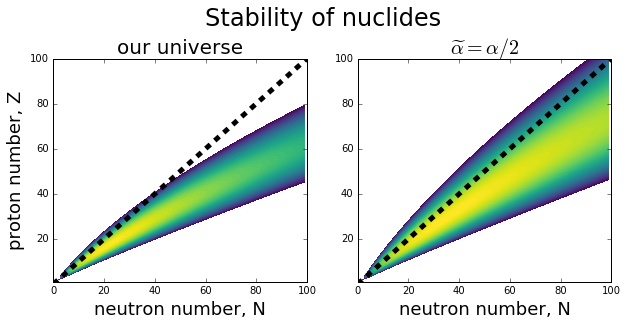

In [6]:
fig1 = plt.figure(num=None, figsize=(10, 4), dpi=320, facecolor='w', edgecolor='k')

ax1 = fig1.add_subplot(1,2,1)
ax1.set_ylim(bottom=1.0, top=100.0)
levels = np.arange(0, np.nanmax(S_ours), 1)
CP_ours = ax1.contourf(N, Z, S_ours, cmap='viridis', levels=levels)
ax1.plot([0, 100], [0, 100], color='black', ls='--', linewidth=5)
ax1.set_xlabel("neutron number, N", fontsize=18)
ax1.set_ylabel("proton number, Z", fontsize=18)
ax1.set_title(r"our universe", fontsize=20)

ax2 = fig1.add_subplot(1,2,2)
ax2.set_ylim(bottom=1.0, top=100.0)
levels = np.arange(0, np.nanmax(S_theirs), 1)
CP_theirs = ax2.contourf(N, Z, S_theirs, cmap='viridis', levels=levels)
ax2.plot([0, 100], [0, 100], color='black', ls='--', linewidth=5)
ax2.set_xlabel("neutron number, N", fontsize=18)
#Share y label
#ax2.set_ylabel("proton number, Z", fontsize=18)
ax2.set_title(r"$\widetilde{\alpha} = \alpha / 2$", fontsize=20)

fig1.suptitle(r"Stability of nuclides", y =1.08, fontsize=24)

plt.savefig("fig/nuclides.pdf", bbox_inches="tight")

## Identifying stable nuclei

For a fixed nucleon number, A, one can find the optimal proton number by maximizing the binding energy.
$$
    \left. \frac{d E_b}{d Z}\right|_{\text{fixed A}} =
    - a_C \frac{2Z - 1}{A^{1/3}}
    + a_{\text{sym}} \frac{4 (A - 2Z)}{A}
    \overset{!}{=} 0.
$$
Let's solve this constraint using `sympy`.

In [7]:
import sympy
sympy.init_printing()

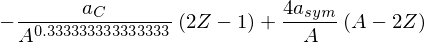

In [8]:
# Declare sympy symbols
ac, asym, zz, aa = sympy.symbols('a_C a_sym Z A', real=True, positive=True)
# Print the constraint
constraint = asym * 4 * (aa - 2 * zz) / aa - ac * (2 * zz - 1) / aa**(1/3)
constraint

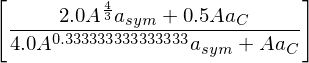

In [9]:
# Solve the constraint for the optimal proton number as a function of A
opt_Z_sympy = sympy.solve(constraint, zz)
opt_Z_sympy

In [10]:
# Insert this expression for Z into the binding energy formula
av, asurf, nn = sympy.symbols('a_V a_S N', real=True, positive=True)
e_b = av * aa - asurf * aa**(2/3) - ac * zz * (zz - 1) / aa**(1/3) - asym * (aa - 2 * zz)**2 / aa
e_b_A_only = e_b.subs(zz, 0.5*(4.0*aa**(4/3)*a_sym + aa*a_C)/(4.0*aa**0.333333333333333*a_sym + aa*a_C))

In [11]:
# Create a numpy function for this expression
e_b_A = sympy.lambdify((aa, av, asurf, ac, asym), e_b_A_only, 'numpy')

# and for the optimal Z expression
opt_Z = sympy.lambdify((aa, ac, asym), opt_Z_sympy, 'numpy')

In [12]:
def find_most_stable_nucleus(alpha_ratio = 1.0):
    """Find the most stable nucleus given the ratio of the fine structure constant
    in parallel universe to that of our universe
    @param[in] alpha_ratio - ratio of the fine structure constant in parallel
                                      universe to that of our universe
    @returns A, Z, BE_per_A - tuple containing total nucleon number, proton number, and binding energy per nucleon"""
    nuclei = np.arange(1, 250)
    energies = (e_b_A(nuclei, a_V, a_S, alpha_ratio * a_C, a_sym) / nuclei)
    A = energies.argmax() + 1
    float_Z = opt_Z(A, alpha_ratio * a_C, a_sym)
    B_ceil = B(A-np.ceil(float_Z), np.ceil(float_Z), alpha_ratio = alpha_ratio)
    B_floor = B(A-np.floor(float_Z), np.floor(float_Z), alpha_ratio = alpha_ratio)
    if (B_ceil > B_floor):
        Z = np.ceil(float_Z)[0]
        BE = B_ceil[0]
    else:
        Z = np.floor(float_Z)[0]
        BE = B_floor[0]
    return A, Z, BE / A

In [14]:
print(find_most_stable_nucleus(alpha_ratio = 1.0))
print(find_most_stable_nucleus(alpha_ratio = 0.5))

(57, 26.0, 8.8242517879578877)
(98, 45.0, 10.125213981971736)


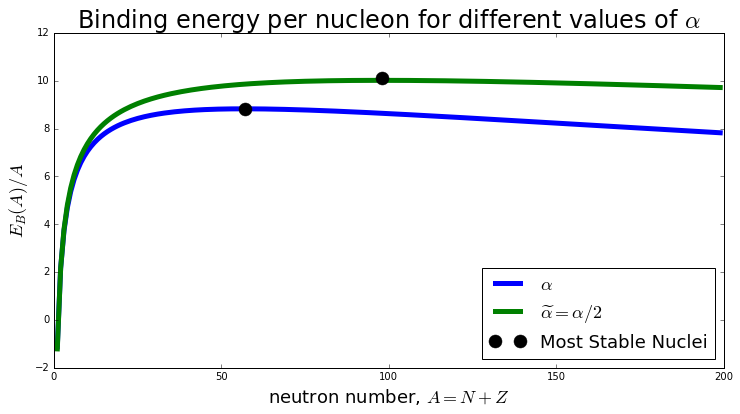

In [15]:
fig2 = plt.figure(num=None, figsize=(12, 6), dpi=320, facecolor='w', edgecolor='k')

nuclei = np.arange(1,200)
ax = fig2.add_subplot(1,1,1)
ax.plot(nuclei, e_b_A(nuclei, a_V, a_S, 1.0 * a_C, a_sym)/ nuclei, label=r"$\alpha$", linewidth=5)
ax.plot(nuclei, e_b_A(nuclei, a_V, a_S, 0.5 * a_C, a_sym)/ nuclei, label=r"$\widetilde{\alpha}=\alpha/2$", linewidth=5)
best_A_ours, best_Z_ours, energy_ours = find_most_stable_nucleus(alpha_ratio = 1.0)
best_A_theirs, best_Z_theirs, energy_theirs = find_most_stable_nucleus(alpha_ratio = 0.5)
ax.plot([best_A_ours, best_A_theirs], [energy_ours, energy_theirs], marker="o", markersize=13,
         linestyle="", color="black",
         label=r"Most Stable Nuclei")
ax.set_xlabel(r"neutron number, $A = N + Z$", fontsize=18)
ax.set_ylabel(r"$E_B(A) / A$", fontsize=18)
ax.set_title(r"Binding energy per nucleon for different values of $\alpha$", fontsize=24)
ax.legend(fontsize=18, loc="lower right")

plt.savefig("fig/binding_energy.pdf", bbox_inches="tight")

In [16]:
def find_stable_isotope(Z, alpha_ratio = 1.0):
    """Find the most stable isotope for a given nucleon number
    @param[in] A - total nucleon number
    @param[in] alpha_ratio - ratio of the fine structure constant in parallel
                                      universe to that of our universe
    @returns Z - proton number of most stable isotope for given A"""
    N = np.arange(0, 200, 1)
    nn, zz = np.meshgrid(N, Z)
    aa = nn + zz
    binding_energies = B(nn, zz, alpha_ratio = alpha_ratio) / aa
    opt_N = binding_energies.argmax(axis=1)
    return np.dstack((Z, opt_N))[0]

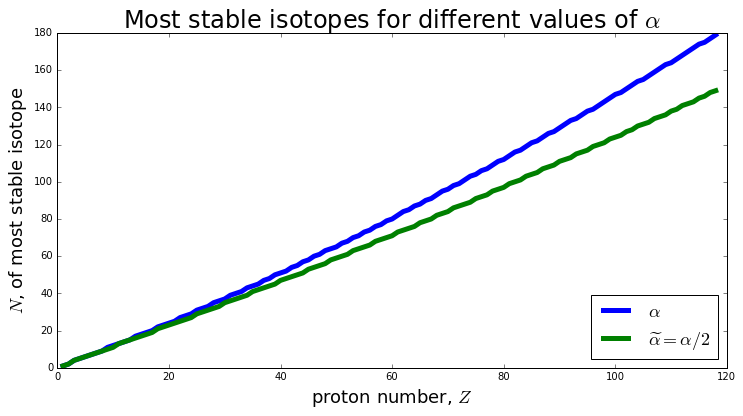

In [17]:
Z = np.arange(1,119)
stable_isotopes_ours = find_stable_isotope(Z, alpha_ratio=1.0)
stable_isotopes_theirs = find_stable_isotope(Z, alpha_ratio=0.5)

fig3 = plt.figure(num=None, figsize=(12, 6), dpi=320, facecolor='w', edgecolor='k')

ax = fig3.add_subplot(1,1,1)
ax.plot(Z, stable_isotopes_ours[:, 1], label=r"$\alpha$", linewidth=5)
ax.plot(Z, stable_isotopes_theirs[:, 1], label=r"$\widetilde{\alpha}=\alpha/2$", linewidth=5)

ax.set_xlabel(r"proton number, $Z$", fontsize=18)
ax.set_ylabel(r"$N$, of most stable isotope", fontsize=18)
ax.set_title(r"Most stable isotopes for different values of $\alpha$", fontsize=24)
ax.legend(fontsize=18, loc="lower right")

plt.savefig("fig/stable_isotopes.pdf", bbox_inches="tight")

## Big Bang Nucleosynthesis

See paper

## Nuclear reactions in the sun and solar neutrino emissions

See paper